In [1]:
#Library imports
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from skimage import data
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [2]:
# To change all the annotation files to .xml files

folder= ["my_annotation_set/n02094433-Yorkshire_terrier", "my_annotation_set/n02099429-curly-coated_retriever", 
                      "my_annotation_set/n02107142-Doberman", "my_annotation_set/n02111500-Great_Pyrenees"]


for folder_path in folder:
    for filename in os.listdir(folder_path):

        if not filename.endswith('.xml'):

            old_file_path = os.path.join(folder_path, filename)     
            new_filename = f"{filename}.xml"
            new_file_path = os.path.join(folder_path, new_filename)

            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} to {new_file_path}')

Displaying images from: my_images_set/n02094433-Yorkshire_terrier


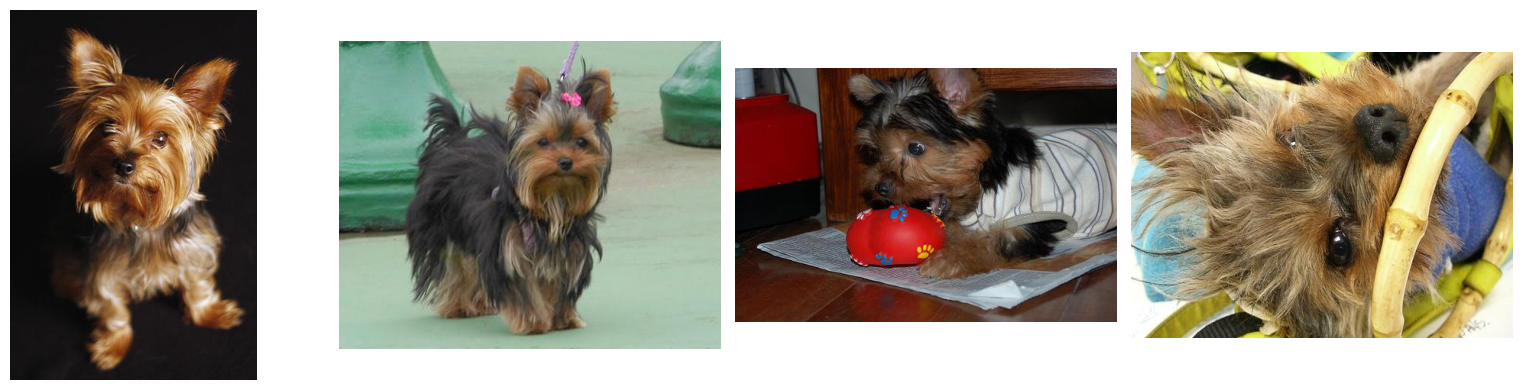

Displaying images from: my_images_set/n02099429-curly-coated_retriever


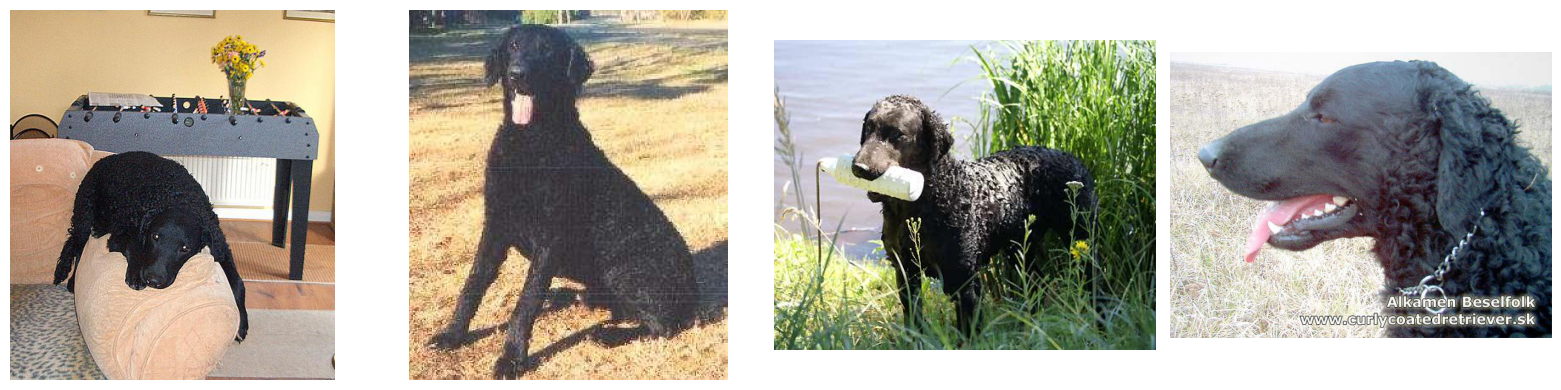

Displaying images from: my_images_set/n02107142-Doberman


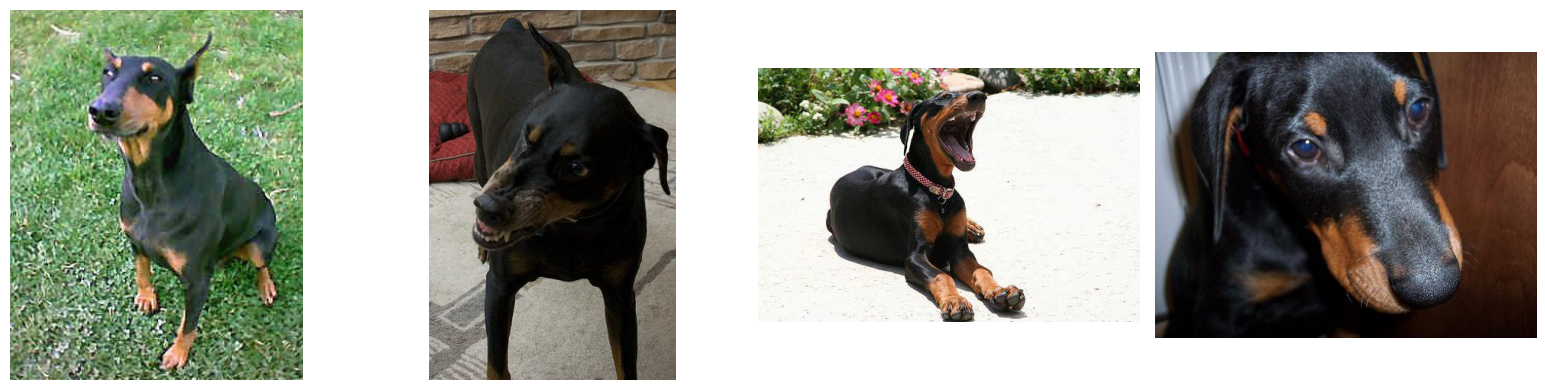

Displaying images from: my_images_set/n02111500-Great_Pyrenees


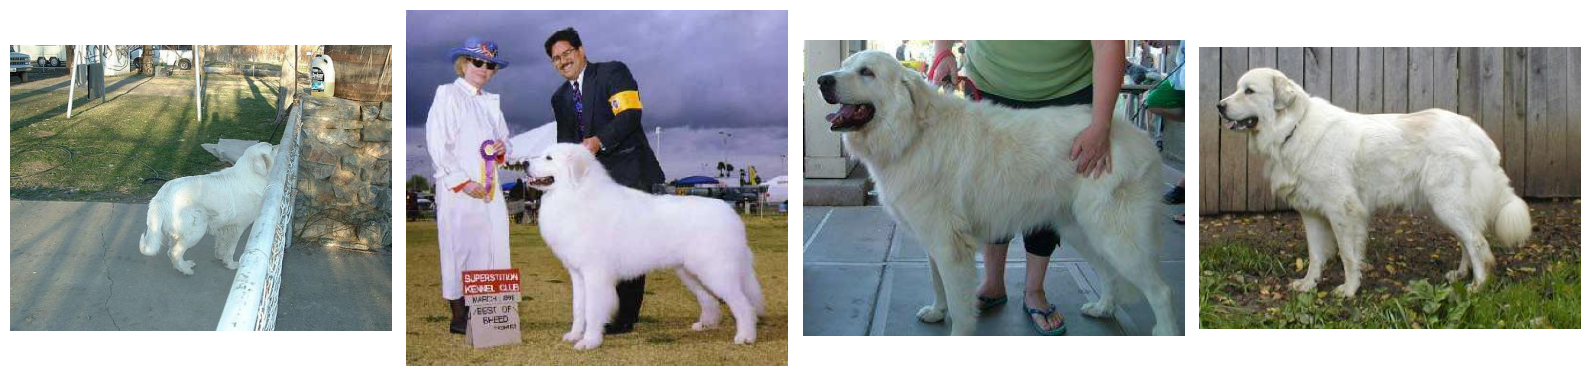

In [3]:
#Displaying four original images from each dataset

image_folders = ["my_images_set/n02094433-Yorkshire_terrier", "my_images_set/n02099429-curly-coated_retriever", 
                 "my_images_set/n02107142-Doberman", "my_images_set/n02111500-Great_Pyrenees"]

for folder_path in image_folders:
    print(f"Displaying images from: {folder_path}")
    
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:4]  
    
    fig, axes = plt.subplots(1, 4, figsize=(16, 4)) 

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = io.imread(image_path) 
        axes[i].imshow(image)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [5]:
#bounding box


annotation_folders = ["my_annotation_set/n02094433-Yorkshire_terrier", 
                      "my_annotation_set/n02099429-curly-coated_retriever", 
                      "my_annotation_set/n02107142-Doberman", 
                      "my_annotation_set/n02111500-Great_Pyrenees"]


def get_bounding_boxes(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bbox = []
    objects = root.findall('object')
    for obj in objects:
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        bbox.append((xmin, ymin, xmax, ymax))
    
    return bbox

for folder in annotation_folders:
    print(f"Processing folder: {folder}")
    
    for filename in os.listdir(folder):
        if filename.endswith(".xml"):
            file_path = os.path.join(folder, filename)
            bbox = get_bounding_boxes(file_path)
            print(f"Bounding boxes for {filename}: {bbox}")


Processing folder: my_annotation_set/n02094433-Yorkshire_terrier
Bounding boxes for n02094433_10123.xml: [(70, 22, 320, 486)]
Bounding boxes for n02094433_10126.xml: [(71, 25, 298, 314)]
Bounding boxes for n02094433_10184.xml: [(145, 0, 498, 279)]
Bounding boxes for n02094433_1030.xml: [(2, 1, 479, 373)]
Bounding boxes for n02094433_1177.xml: [(16, 18, 379, 279)]
Bounding boxes for n02094433_1210.xml: [(1, 57, 481, 374)]
Bounding boxes for n02094433_1211.xml: [(71, 29, 499, 330)]
Bounding boxes for n02094433_1219.xml: [(101, 65, 336, 398)]
Bounding boxes for n02094433_126.xml: [(27, 81, 316, 498)]
Bounding boxes for n02094433_1269.xml: [(98, 255, 352, 498)]
Bounding boxes for n02094433_1301.xml: [(83, 211, 215, 316)]
Bounding boxes for n02094433_1312.xml: [(1, 1, 355, 332)]
Bounding boxes for n02094433_1324.xml: [(96, 14, 354, 374)]
Bounding boxes for n02094433_1376.xml: [(12, 1, 393, 374)]
Bounding boxes for n02094433_1483.xml: [(146, 24, 423, 363)]
Bounding boxes for n02094433_1490.x

In [7]:
#cropping and resizing
from pathlib import Path

output_folder = "cropped_images"

def crop_and_resize_images():
    for i, folder in enumerate(annotation_folders):
        print(f"Processing folder: {folder}")
        image_folder = image_folders[i]
        
        for filename in os.listdir(folder):
            if filename.endswith(".xml"):
                xml_file_path = os.path.join(folder, filename)
                bbox = get_bounding_boxes(xml_file_path)

                image_name = filename.replace(".xml", ".jpg")
                image_path = os.path.join(image_folder, image_name)
                
                if os.path.exists(image_path):
                    image = Image.open(image_path)

                    for idx, (xmin, ymin, xmax, ymax) in enumerate(bbox):
                        cropped_image = image.crop((xmin, ymin, xmax, ymax))
                        resized_image = cropped_image.resize((128, 128), Image.LANCZOS)

                        resized_image = resized_image.convert("RGB")

                        new_path = image_path.replace(image_folder, output_folder)
                        new_path = new_path.replace('.jpg', f'-resized{idx}.jpg')

                        head, _ = os.path.split(new_path)
                        Path(head).mkdir(parents=True, exist_ok=True)

                        resized_image.save(new_path)
                        print(f"Saved cropped and resized image: {new_path}")

crop_and_resize_images()



Processing folder: my_annotation_set/n02094433-Yorkshire_terrier
Saved cropped and resized image: cropped_images\n02094433_10123-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_10126-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_10184-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1030-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1177-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1210-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1211-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1219-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_126-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1269-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1301-resized0.jpg
Saved cropped and resized image: cropped_images\n02094433_1312-resized0.jpg
Saved cropped and res

Saved grayscale image: grayimgs\gray_n02094433_3947-resized0.jpg


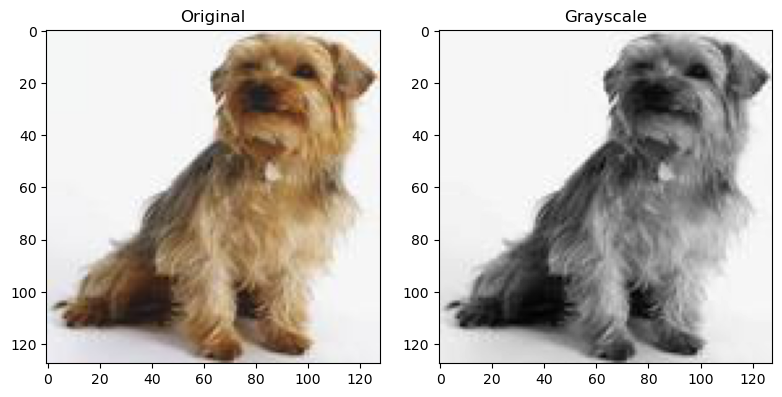

Saved grayscale image: grayimgs\gray_n02099429_2236-resized0.jpg


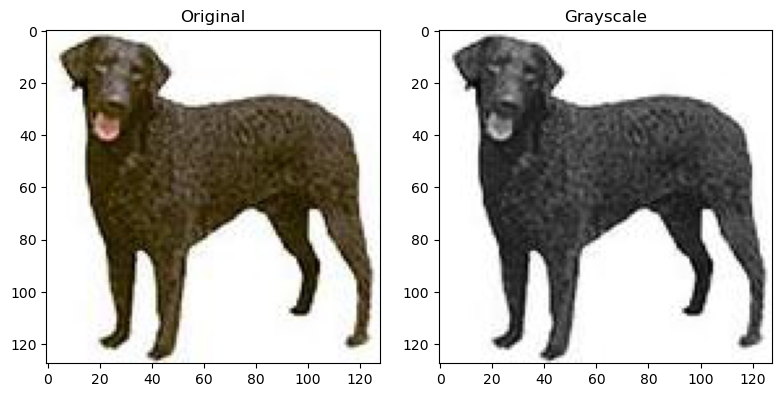

Saved grayscale image: grayimgs\gray_n02107142_3171-resized0.jpg


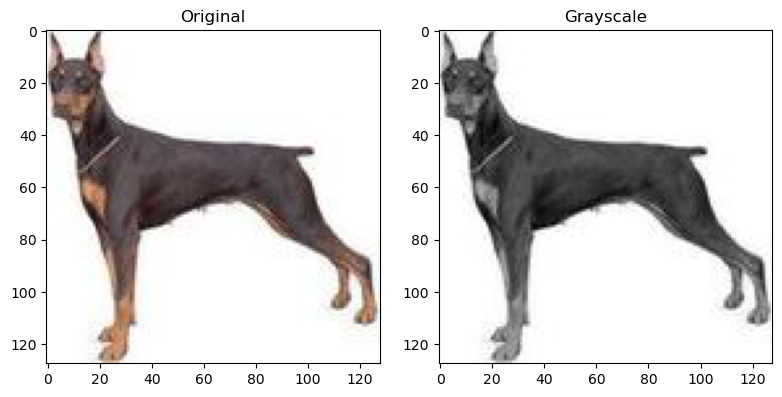

Saved grayscale image: grayimgs\gray_n02111500_2010-resized0.jpg


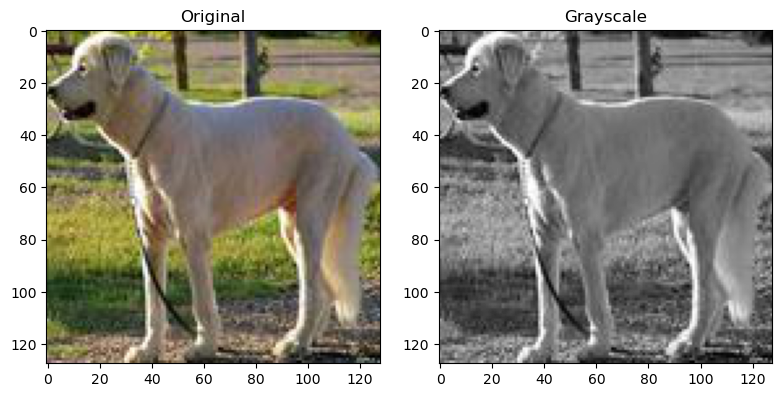

In [9]:

image_folder = 'images4'
output_folder = 'grayimgs'

image_files = [
    'n02094433_3947-resized0.jpg', 
    'n02099429_2236-resized0.jpg', 
    'n02107142_3171-resized0.jpg', 
    'n02111500_2010-resized0.jpg'
]


for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    original = io.imread(image_path)
    
    grayscale = rgb2gray(original)

    grayscale_image = Image.fromarray((grayscale * 255).astype('uint8'))  
    output_image_path = os.path.join(output_folder, f"gray_{image_file}")
    grayscale_image.save(output_image_path)
    print(f"Saved grayscale image: {output_image_path}")

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(grayscale, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")

    fig.tight_layout()

    plt.show()

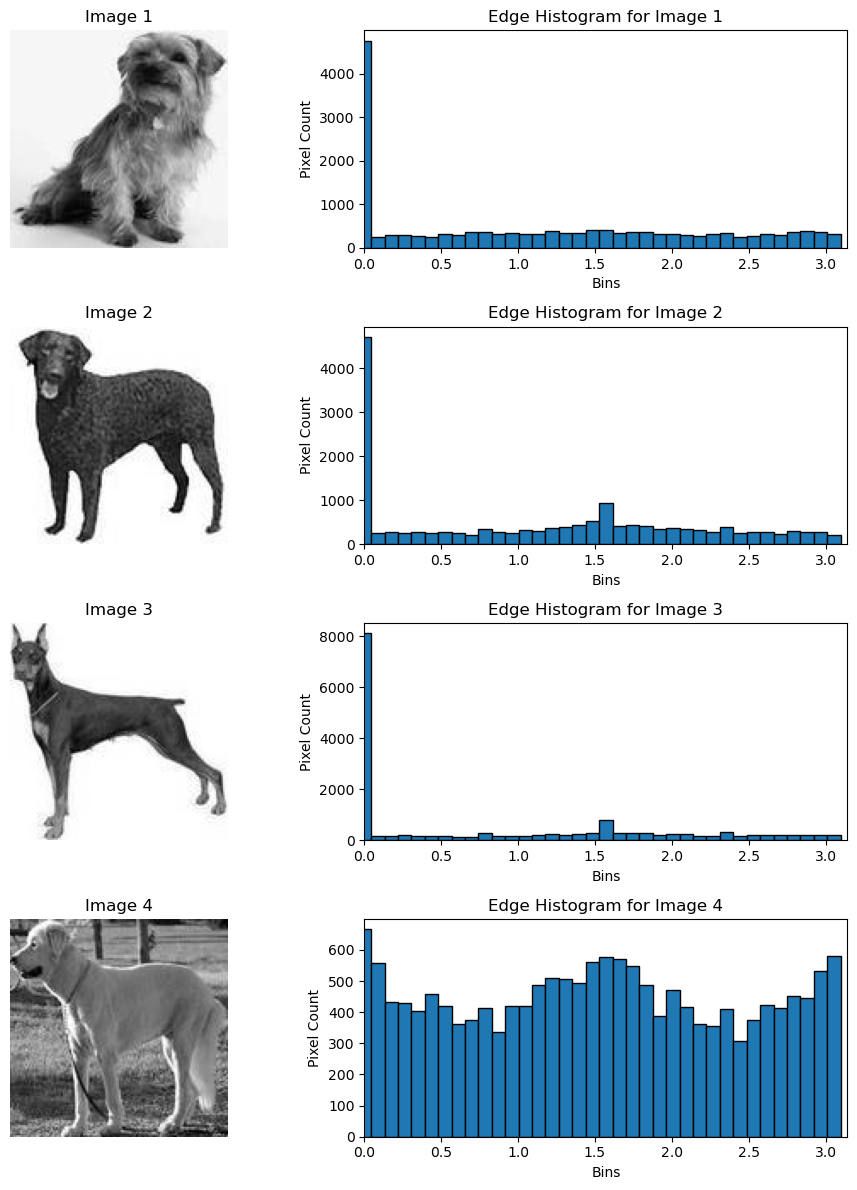

In [10]:
#plotting the corresponding edge histograms
gray_images_folder = 'grayimgs'
image_files = ['gray_n02094433_3947-resized0.jpg', 'gray_n02099429_2236-resized0.jpg', 
               'gray_n02107142_3171-resized0.jpg', 'gray_n02111500_2010-resized0.jpg']

images = []
histograms = []

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

for file in image_files:
    image_path = os.path.join(gray_images_folder, file)
    I = io.imread(image_path)
    
    sobel_h = filters.sobel_h(I) 
    sobel_v = filters.sobel_v(I) 
    
    angle_sobel = angle(sobel_h, sobel_v)

    hist, bins = exposure.histogram(angle_sobel, nbins=36)
    histograms.append(hist)

    images.append(I)

fig, axes = plt.subplots(4, 2, figsize=(10,12))

for i, ax in enumerate(axes):
    ax[0].imshow(images[i], cmap='gray')
    ax[0].set_title(f"Image {i + 1}")
    ax[0].axis('off')
    
    hist = histograms[i]
    bins = np.linspace(0, np.pi, num=37)
    
    ax[1].bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black')
    ax[1].set_title(f"Edge Histogram for Image {i + 1}")
    ax[1].set_xlabel("Bins")
    ax[1].set_ylabel("Pixel Count")
    ax[1].set_xlim([0, np.pi])
    
plt.tight_layout()
plt.show()


In [11]:
for i in range(len(histograms)):
    print(histograms[i])

[4761  262  304  300  269  259  318  302  372  378  332  341  326  331
  399  345  338  422  419  350  378  370  323  323  294  264  322  343
  263  282  325  305  375  389  369  331]
[4710  248  276  258  270  264  285  266  216  350  267  254  321  293
  371  387  437  529  926  413  446  417  342  374  349  315  274  402
  261  277  281  241  307  270  268  219]
[8110  188  180  219  177  180  168  154  138  289  175  178  194  209
  270  226  268  289  783  273  301  303  233  257  250  176  190  349
  177  198  232  198  227  202  219  204]
[666 558 433 430 405 459 420 363 374 413 337 421 420 489 511 506 493 562
 579 571 549 489 388 472 417 362 356 411 308 375 424 412 453 445 532 581]


In [12]:
from sklearn.metrics.pairwise import euclidean_distances,manhattan_distances, cosine_similarity
x=histograms[0].reshape(1, -1)
y=histograms[1].reshape(1, -1)
a=euclidean_distances(x,y)
b=manhattan_distances(x,y)
c=cosine_similarity(x,y)
print(a,b,c)

[[632.25944042]] [[2348.]] [[0.99248772]]


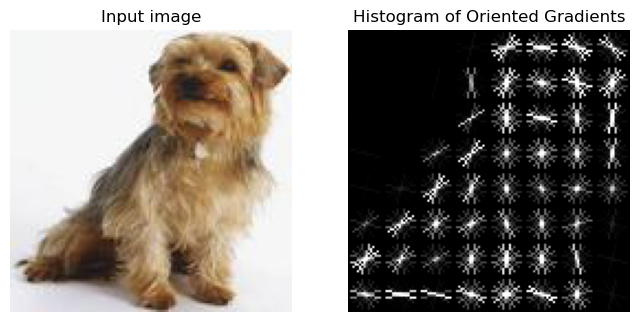

In [13]:
#hog features
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image_path = 'images4/n02094433_3947-resized0.jpg'
image = io.imread(image_path)

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [15]:
#Converting all the images from the four classes to edge histograms

input_folder = "cropped_images"
output_folder = "edge_histograms"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))] 


def compute_edge_histogram(image_path):
    I = io.imread(image_path)

    if I.ndim == 3: 
        I = color.rgb2gray(I)

    sobel_h = filters.sobel_h(I)
    sobel_v = filters.sobel_v(I)

    angle = np.arctan2(sobel_v, sobel_h)
    angle = np.mod(angle, np.pi) 
    
    hist, bins = exposure.histogram(angle, nbins=36)  

    return hist

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    
    histogram = compute_edge_histogram(image_path)

    hist_file_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_histogram.npy")
    np.save(hist_file_path, histogram)
    
    print(f"Saved edge histogram for {image_file} to {hist_file_path}")

print("All edge histograms have been computed and saved.")


Saved edge histogram for n02094433_10123-resized0.jpg to edge_histograms\n02094433_10123-resized0_histogram.npy
Saved edge histogram for n02094433_10126-resized0.jpg to edge_histograms\n02094433_10126-resized0_histogram.npy
Saved edge histogram for n02094433_10184-resized0.jpg to edge_histograms\n02094433_10184-resized0_histogram.npy
Saved edge histogram for n02094433_1030-resized0.jpg to edge_histograms\n02094433_1030-resized0_histogram.npy
Saved edge histogram for n02094433_1177-resized0.jpg to edge_histograms\n02094433_1177-resized0_histogram.npy
Saved edge histogram for n02094433_1210-resized0.jpg to edge_histograms\n02094433_1210-resized0_histogram.npy
Saved edge histogram for n02094433_1211-resized0.jpg to edge_histograms\n02094433_1211-resized0_histogram.npy
Saved edge histogram for n02094433_1219-resized0.jpg to edge_histograms\n02094433_1219-resized0_histogram.npy
Saved edge histogram for n02094433_126-resized0.jpg to edge_histograms\n02094433_126-resized0_histogram.npy
Saved 

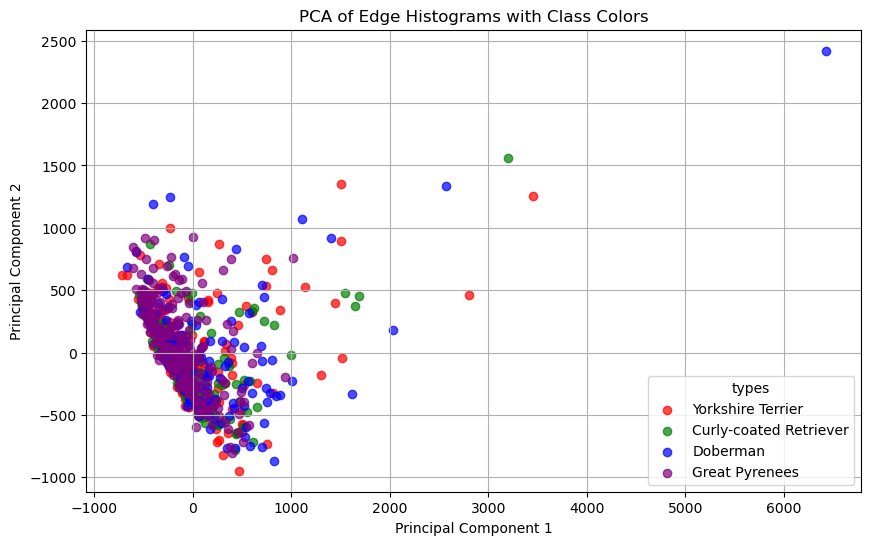

In [16]:
#plotting the 2D points

histogram_folder = "edge_histograms"

histograms = []
type = [] 

for file in os.listdir(histogram_folder):
    if file.endswith('.npy'):
        histogram = np.load(os.path.join(histogram_folder, file))
        histograms.append(histogram)
        
        if 'n02094433' in file:
            type.append(0) 
        elif 'n02099429' in file:
            type.append(1) 
        elif 'n02107142' in file:
            type.append(2) 
        elif 'n02111500' in file:
            type.append(3) 

histograms_array = np.array(histograms)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(histograms_array)

colors = ['red', 'green', 'blue', 'purple']
typenames = ['Yorkshire Terrier', 'Curly-coated Retriever', 'Doberman', 'Great Pyrenees']

plt.figure(figsize=(10, 6))
for class_idx in range(4): 
    class_data = reduced_data[np.array(type) == class_idx]
    plt.scatter(class_data[:, 0], class_data[:, 1], 
                color=colors[class_idx], 
                label=typenames[class_idx], 
                alpha=0.7)

plt.title("PCA of Edge Histograms with Class Colors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.legend(loc='lower right', title="types")
plt.show()